<div style="text-align: center; font-size: 36px;">
    Student Pledge
</div>

By answering the questions in this notebook, I pledge that I will **not use any AI tools or external sources** to assist me in completing this exam. I affirm that the work submitted is entirely my own and was completed without any form of plagiarism or external help. I understand that any violation of these terms will result in **serious consequences** as per the institute's policy.

I agree to the above terms and conditions by submitting this notebook.

---

### Important:
- You **must not delete** this cell or any part of this notebook.
- All answers **must be written below** the respective cells for each question.
- **Deleting or altering this cell** will result in **your submission not being accepted**.

# Name: M Praveen Kumar

## Roll Num: P2522036


## **Instructions**

1. **Submission Guidelines**:
   - Complete the project in the provided Jupyter Notebook file only. Submissions in any other format (e.g., `.zip`, `.py`) will not be accepted.
   - Mention your **Name** and **Roll Number** clearly at the top of the notebook.
   - Write inferences in the text cells provided below each solution. Ensure clarity and precision in your explanations.
   - **Last date to submit project**: 21 Nov 2025 (EoD).

   

---

## Marks Distribution
- Total Marks: 15  
  - Question 1 → 10 Marks (CO1 / PO1)
  - Question 2 → 5 Marks (CO2 / PO2)  
  - Question 3 → 10 Marks (CO2 / PO2)

---

# Absenteeism Prediction Project — Dataset Description and Questions
### Total Marks: 25  
### Batch: PGCM 2025–26

## Project Background / Story

A manufacturing company has been experiencing inconsistent employee attendance, which has begun to affect productivity and project timelines. To better understand the factors contributing to absenteeism, the HR Analytics team has collected comprehensive data on employees. This includes demographic details, lifestyle habits, work-related variables, and health indicators.

The goal of this project is to analyze absenteeism behaviour and build predictive models that classify employees based on their level of absenteeism. This helps the organization manage workforce planning, employee well-being, and operational efficiency.

The original target variable, **Absenteeism time in hours**, has to be converted into three categories using the following rule:

- Low: ≤ 2 hours  
- Medium: 3–5 hours  
- High: > 5 hours  

This categorized target variable shoule be stored as:

Absenteeism category

---

## Feature Description

### Feature Description

- **Individual identification (ID)**
- **Reason for absence** (coded using ICD categories 1–28)
- **Month of absence** (1–12; 0 indicates no recorded absence)
- **Day of the week**  
  - 2 = Monday  
  - 3 = Tuesday  
  - 4 = Wednesday  
  - 5 = Thursday  
  - 6 = Friday  
- **Seasons**  
  - 1 = Summer  
  - 2 = Autumn  
  - 3 = Winter  
  - 4 = Spring  
- **Transportation expense**
- **Distance from Residence to Work** (in kilometers)
- **Service time** (years of service)
- **Age**
- **Workload Average/day**
- **Hit target** (percentage)
- **Disciplinary failure** (1 = Yes; 0 = No)
- **Education**  
  - 1 = High School  
  - 2 = Graduate  
  - 3 = Postgraduate  
  - 4 = Master or Doctorate  
- **Son** (number of children)
- **Social drinker** (1 = Yes; 0 = No)
- **Social smoker** (1 = Yes; 0 = No)
- **Pet** (number of pets)
- **Weight**
- **Height**
- **Body mass index (BMI)**
- **Absenteeism time in hours** (original target before categorization)


---




## Q1. Exploratory Data Analysis, Data Preparation, and Feature Engineering  


Perform a specific and focused EDA and data preparation following the CRISP-DM methodology. Your analysis must include the following:

### Data Understanding and Quality Check
- Identify missing values and invalid entries (for example, Month = 0).
- Explore patterns across seasons, workload, age, smoking/drinking habits, and distance.

### Target Variable Verification
- Display the distribution of the Low, Medium, and High absenteeism categories.

### Feature Engineering
- Create at least two meaningful engineered features, such as:
  - BMI categories (Underweight, Normal, Overweight, Obese)
  - Distance bins (Near, Medium, Far)
  - Ratio of workload to service time
- Explain why these engineered features may help in predicting absenteeism.

### Encoding and Preparation
- Apply suitable categorical encoding.
- Justify why specific columns are treated as categorical or numerical.

---

In [50]:
## Solutions here
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")

In [51]:
#Read file as panda dataframe
df = pd.read_csv(r"employee.csv")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [52]:
df.shape

(740, 21)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  737 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    object 
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

In [54]:
# Renaming the columns for better Code Readability

df.rename(columns={'Month of absence':'Month_absence',
                      'Day of the week':'Week',
                      'Transportation expense':'Transport_expense',
                      'Distance from Residence to Work':'Dist_ResidenceToWork',
                      'Service time':'Service_Time',
                      'Work load Average/day ':'Average_Workload',
                      'Disciplinary failure':'Disciplinary_failure',
                      'Social drinker':'Social_drinker',
                      'Social smoker':'Social_smoker',
                      'Body mass index':'Body_mass_index',
                      'Absenteeism time in hours':'Absenteeism_time_in_hrs'},inplace=True)

In [55]:
# checking for missing values
df.isnull().sum() 

ID                          0
Reason for absence          3
Month_absence               1
Week                        0
Seasons                     0
Transport_expense           7
Dist_ResidenceToWork        3
Service_Time                3
Age                         3
Average_Workload           10
Hit target                  6
Disciplinary_failure        6
Education                  10
Son                         6
Social_drinker              3
Social_smoker               4
Pet                         2
Weight                      1
Height                     14
Body_mass_index            31
Absenteeism_time_in_hrs    22
dtype: int64

***As there are multiple missing vectors across many Features, We need to do imputation***.

## Data Understanding and Quality Check

In [56]:
# Removing invalid entries

# Dropped rows with entry as "0"
df = df.drop(df[df['Month_absence'] == 0].index)

# Dropped rows with empty values in Absenteeism_time_in_hrs
df = df.drop(df[df['Absenteeism_time_in_hrs'].isna()].index)

# Dropping ID column as it is not relevant here
df = df.drop(columns=['ID'])

# checking for missing values
df.isnull().sum() 


Reason for absence          3
Month_absence               1
Week                        0
Seasons                     0
Transport_expense           6
Dist_ResidenceToWork        3
Service_Time                3
Age                         2
Average_Workload            8
Hit target                  6
Disciplinary_failure        5
Education                  10
Son                         6
Social_drinker              3
Social_smoker               4
Pet                         2
Weight                      1
Height                     14
Body_mass_index            29
Absenteeism_time_in_hrs     0
dtype: int64

## Mapping for better visualisation

In [57]:
# Encoding/mapping the Day of the week column
df['Week'] = df['Week'].map({2:'mon',3:'tue',4:'wed',5:'thu',6:'fri'})

# Encoding/mapping the Seasons column
df.Seasons = df.Seasons.map({1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'})

# Encoding/mapping the Month of absence column
df['Month_absence'] = df['Month_absence'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding/mapping the Education column
df.Education = df.Education.map({1:'High School',2:'Graduate',3:'Postgraduate',4:'Master or Doctorate'})


In [58]:
# check the head of the dataset
df.head()

,Reason for absence,Month_absence,Week,Seasons,Transport_expense,Dist_ResidenceToWork,Service_Time,Age,Average_Workload,Hit target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hrs
0,26.0,jul,tue,Summer,289.0,36.0,13.0,33.0,"239,554",97.0,0.0,High School,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,0.0,jul,tue,Summer,118.0,13.0,18.0,50.0,"239,554",97.0,1.0,High School,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,23.0,jul,wed,Summer,179.0,51.0,18.0,38.0,"239,554",97.0,0.0,High School,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,jul,thu,Summer,279.0,5.0,14.0,39.0,"239,554",97.0,0.0,High School,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,23.0,jul,thu,Summer,289.0,36.0,13.0,33.0,"239,554",97.0,0.0,High School,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


## Typecasting: 

In [59]:
# Typecasting

df['Reason for absence'] = df['Reason for absence'].astype('category')
df['Month_absence'] = df['Month_absence'].astype('category')
df['Week'] = df['Week'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Disciplinary_failure'] = df['Disciplinary_failure'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Son'] = df['Son'].astype('category')
df['Social_smoker'] = df['Social_smoker'].astype('category')
df['Social_drinker'] = df['Social_drinker'].astype('category')
df['Pet'] = df['Pet'].astype('category')

# Typecast: Convert 'Workload Average/day' to float and replacing ',' by ' ' 
df["Average_Workload"] = df["Average_Workload"].replace(",", "", regex=True).astype(float)

df.dtypes

Reason for absence         category
Month_absence              category
Week                       category
Seasons                    category
Transport_expense           float64
Dist_ResidenceToWork        float64
Service_Time                float64
Age                         float64
Average_Workload            float64
Hit target                  float64
Disciplinary_failure       category
Education                  category
Son                        category
Social_drinker             category
Social_smoker              category
Pet                        category
Weight                      float64
Height                      float64
Body_mass_index             float64
Absenteeism_time_in_hrs     float64
dtype: object

Categorical Columns: represent labels, groups, or discrete categories rather than measurable quantities.
They don’t have numerical meaning, and the model should treat each unique value as a separate group.

Numerical Columns: contain continuous or count-based values that represent measurable quantities.
The magnitude of these numbers matters, so they should be treated as numerical for scaling and model calculations.

##  Visualising the Data

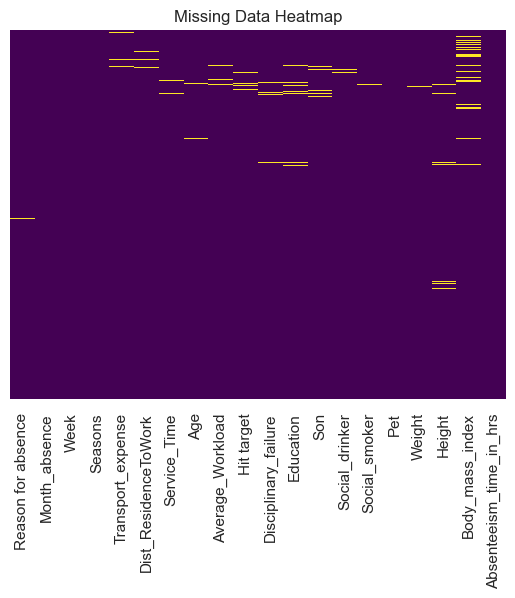

In [60]:
# We Use Heat Map for missing data visualisation

sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

## Target Variable Verification

In [61]:
#Add a feature 'Absenteeism category' and check condition
df['Absenteeism_category'] = df['Absenteeism_time_in_hrs'].apply(lambda value: 'low' if value <= 2 else 'medium' if 3 <= value <= 5  else 'high')

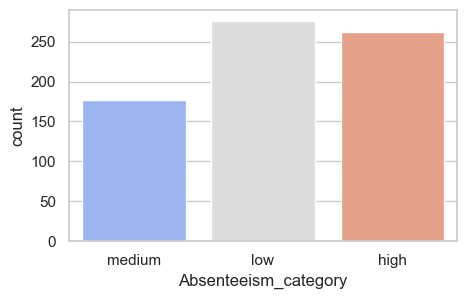

In [62]:
#class distribution of Absenteeism category
plt.figure(figsize=(5, 3))
sns.countplot(x='Absenteeism_category', data= df, palette="coolwarm")
plt.show()  

***From the above graph, Classes are balanced here, We don't need to use SMOTE***.

# EDA with Graph for Independent and Dependent Features:

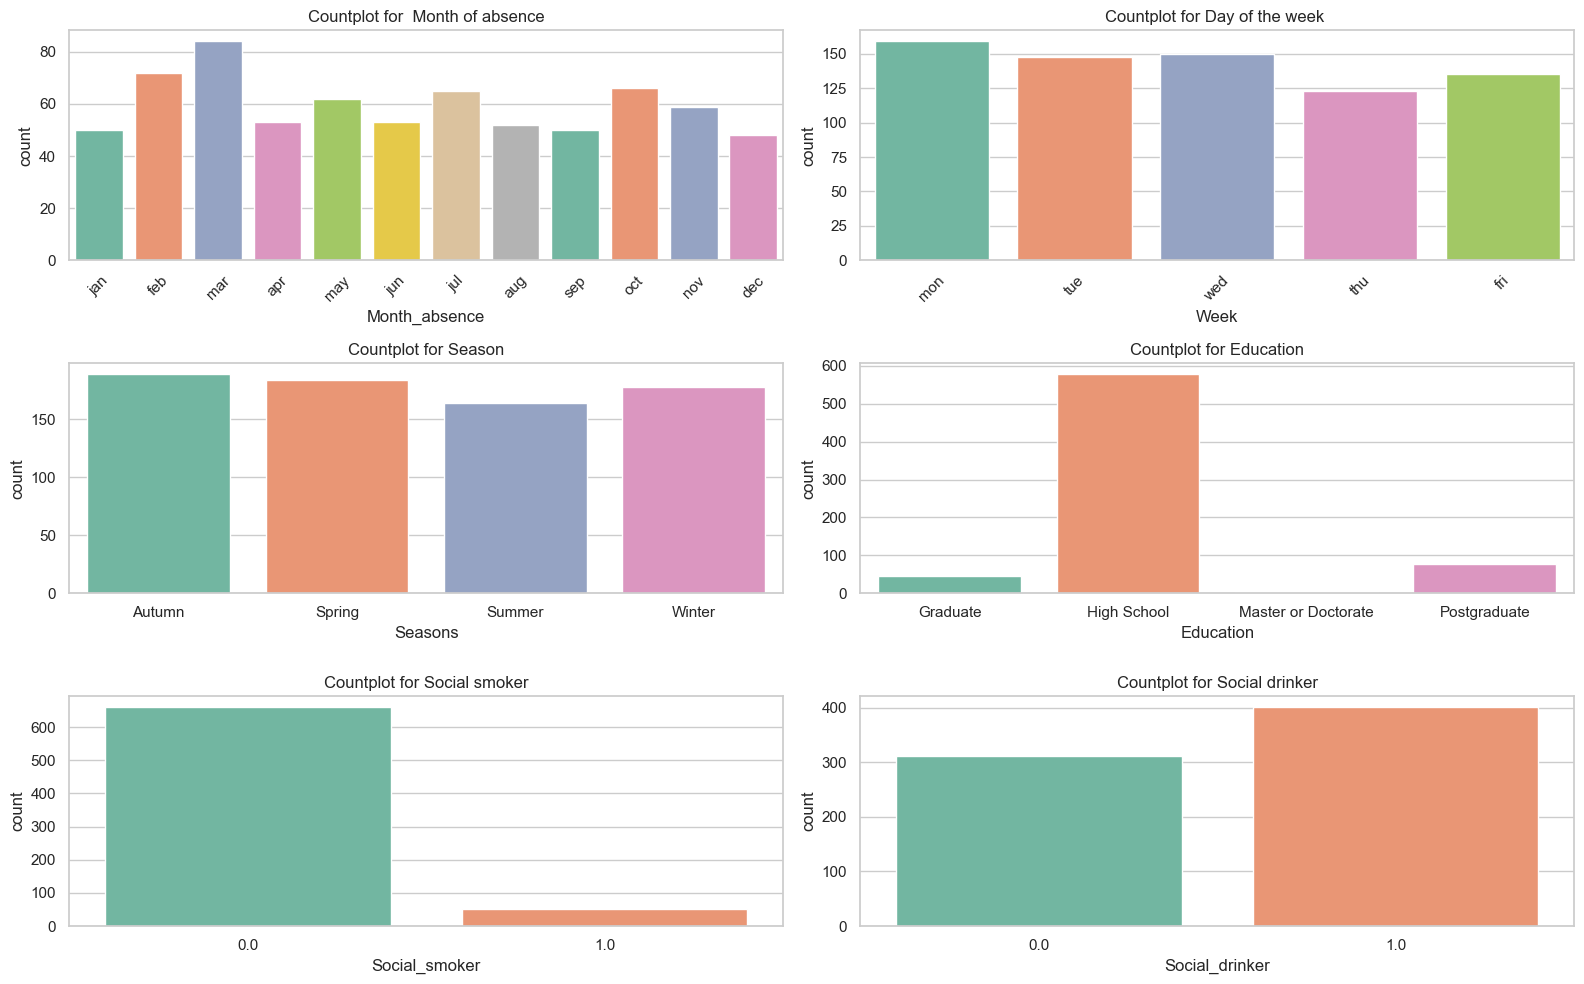

In [63]:
# univariate analysis

fig, axes = plt.subplots(3, 2, figsize=(16, 10))
sns.set(style="whitegrid")

# Subplot 1: Month of absence,
sns.countplot(data=df, x='Month_absence', ax=axes[0, 0], order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],palette='Set2')
axes[0, 0].set_title('Countplot for  Month of absence')
axes[0, 0].tick_params(axis='x', rotation=45)

# Subplot 2: Day of the week 
sns.countplot(data=df, x='Week', ax=axes[0, 1], order=['mon','tue','wed','thu','fri'], palette='Set2')
axes[0, 1].set_title('Countplot for Day of the week ')
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Seasons
sns.countplot(data=df, x='Seasons', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Countplot for Season')

# Subplot 4: Education
sns.countplot(data=df, x='Education', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Countplot for Education')

# Subplot 5: Social smoker
sns.countplot(data=df, x='Social_smoker', ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title('Countplot for Social smoker')

# Subplot 6: Social drinker
sns.countplot(data=df, x='Social_drinker', ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Countplot for Social drinker')

# Adjust layout
plt.tight_layout()
plt.show()

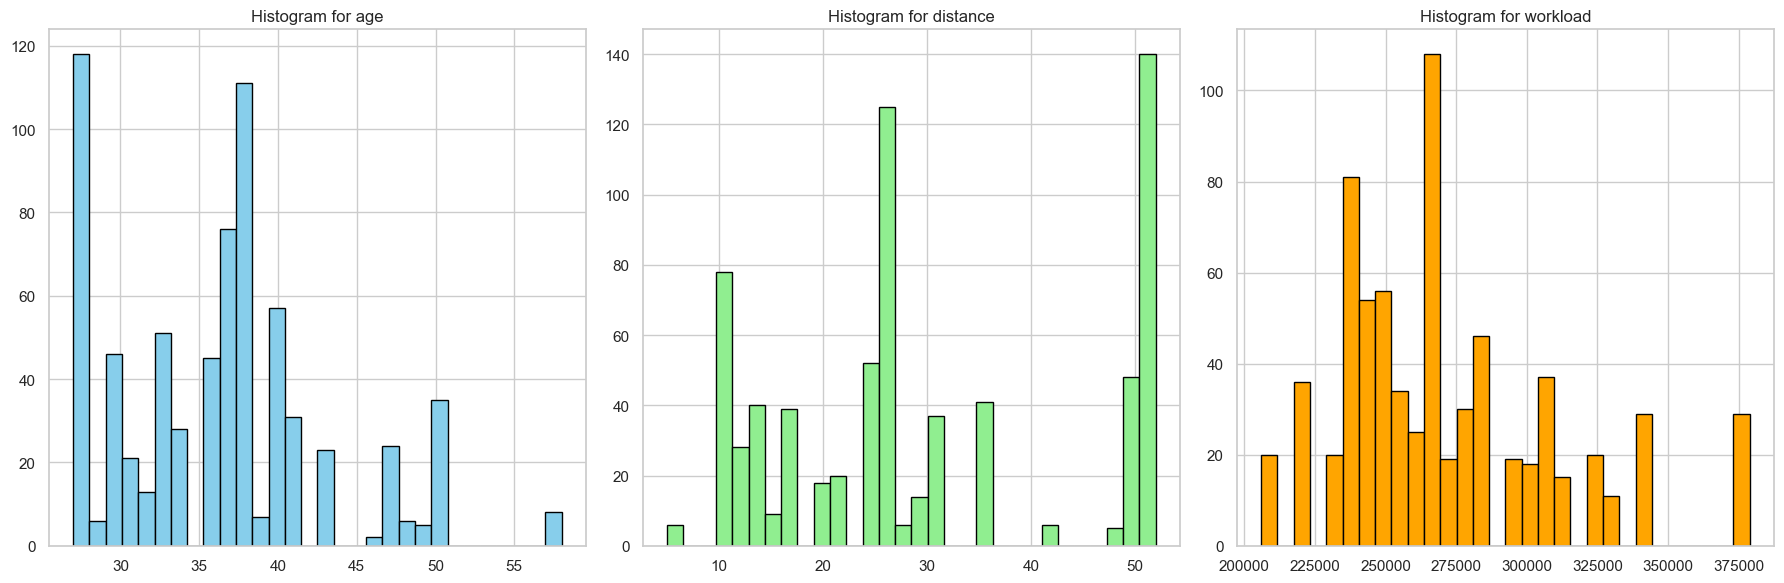

In [64]:
#Univariate Analysis

sns.set(style='whitegrid')

# Create subplots (1 rows, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram 1: Age
axes[0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram for age')

# Histogram 2: Distance from Residence to Work
axes[1].hist(df['Dist_ResidenceToWork'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram for distance')

# Histogram 3: Work load Average/day                    
axes[2].hist(df['Average_Workload'], bins=30, color='orange', edgecolor='black')
axes[2].set_title('Histogram for workload')


# Adjust layout
plt.tight_layout()
plt.show()


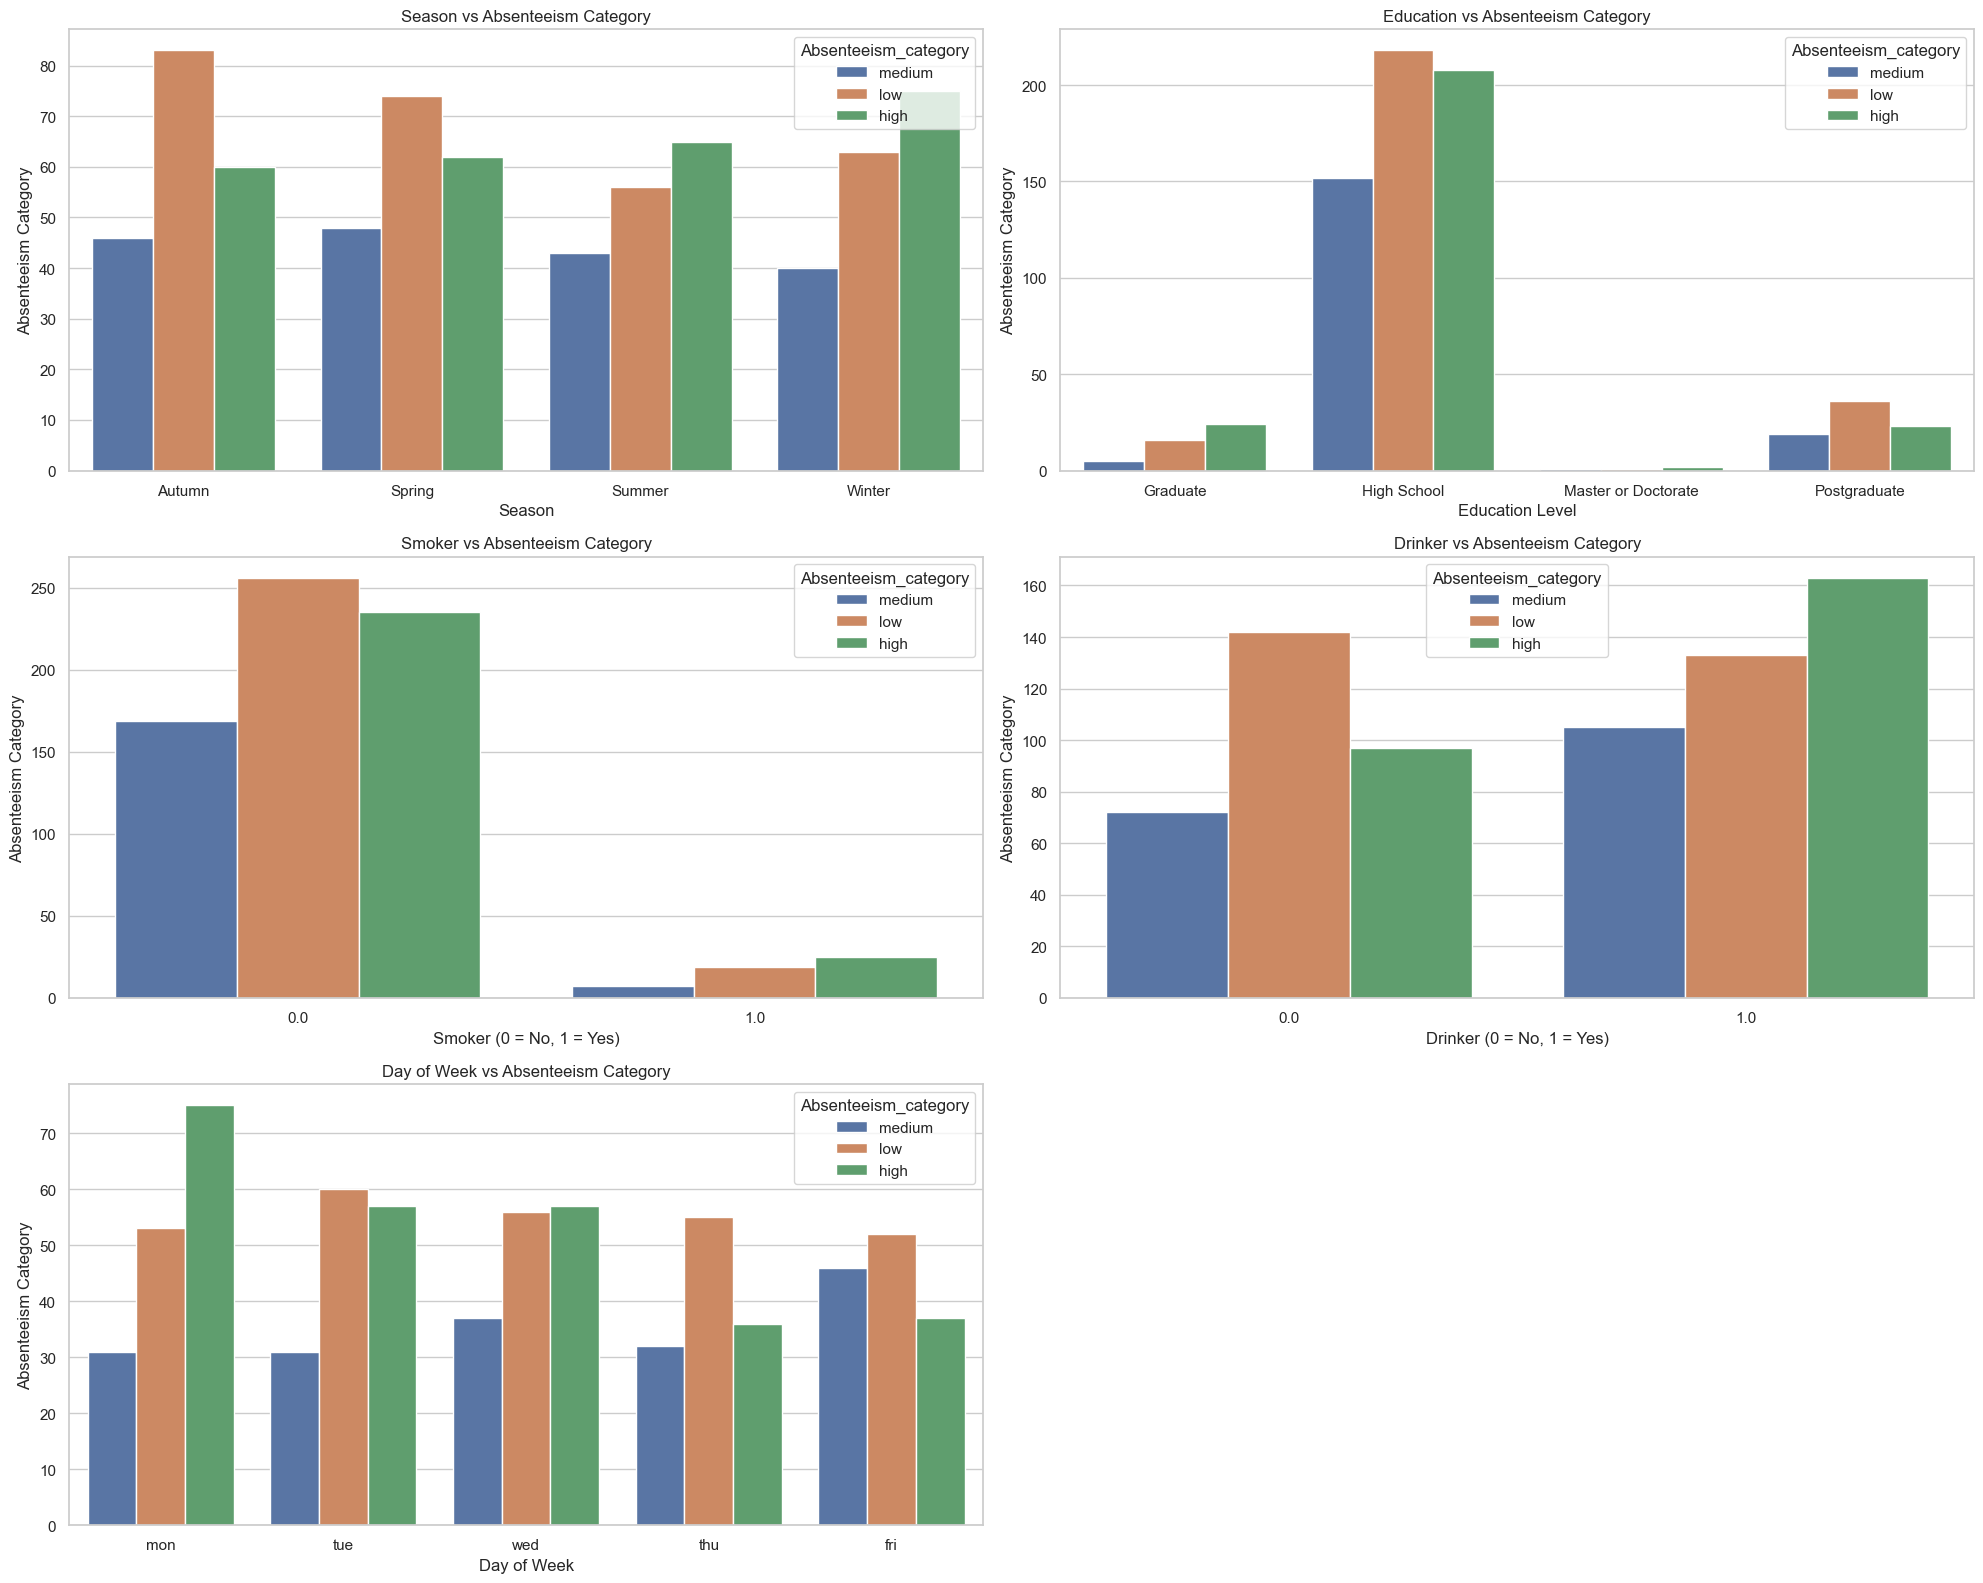

In [65]:
# Bivariate analysis

sns.set(style='whitegrid')

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

# Plot 1: Season vs Absenteeism_category
sns.countplot(data=df, x='Seasons', hue='Absenteeism_category', ax=axes[0, 0])
axes[0, 0].set_title('Season vs Absenteeism Category')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Absenteeism Category')

# Plot 2: Education vs Absenteeism_category
sns.countplot(data=df, x='Education', hue='Absenteeism_category', ax=axes[0, 1])
axes[0, 1].set_title('Education vs Absenteeism Category')
axes[0, 1].set_xlabel('Education Level')
axes[0, 1].set_ylabel('Absenteeism Category')

# Plot 3: Smoker vs Absenteeism_category
sns.countplot(data=df, x='Social_smoker', hue='Absenteeism_category', ax=axes[1, 0])
axes[1, 0].set_title('Smoker vs Absenteeism Category')
axes[1, 0].set_xlabel('Smoker (0 = No, 1 = Yes)')
axes[1, 0].set_ylabel('Absenteeism Category')

# Plot 4: Drinker vs Absenteeism_category
sns.countplot(data=df, x='Social_drinker', hue='Absenteeism_category', ax=axes[1, 1])
axes[1, 1].set_title('Drinker vs Absenteeism Category')
axes[1, 1].set_xlabel('Drinker (0 = No, 1 = Yes)')
axes[1, 1].set_ylabel('Absenteeism Category')

# Plot 5: Week vs Absenteeism_category 
sns.countplot(data=df, x='Week', hue='Absenteeism_category',
              order=['mon','tue','wed','thu','fri'], ax=axes[2, 0])
axes[2, 0].set_title('Day of Week vs Absenteeism Category')
axes[2, 0].set_xlabel('Day of Week')
axes[2, 0].set_ylabel('Absenteeism Category')

# Empty last subplot
axes[2, 1].axis('off')

# Layout
plt.tight_layout()
plt.show()



##
From above, we can see there is no fixed patters across all features, the numbers are fluctuating, means noise is available.

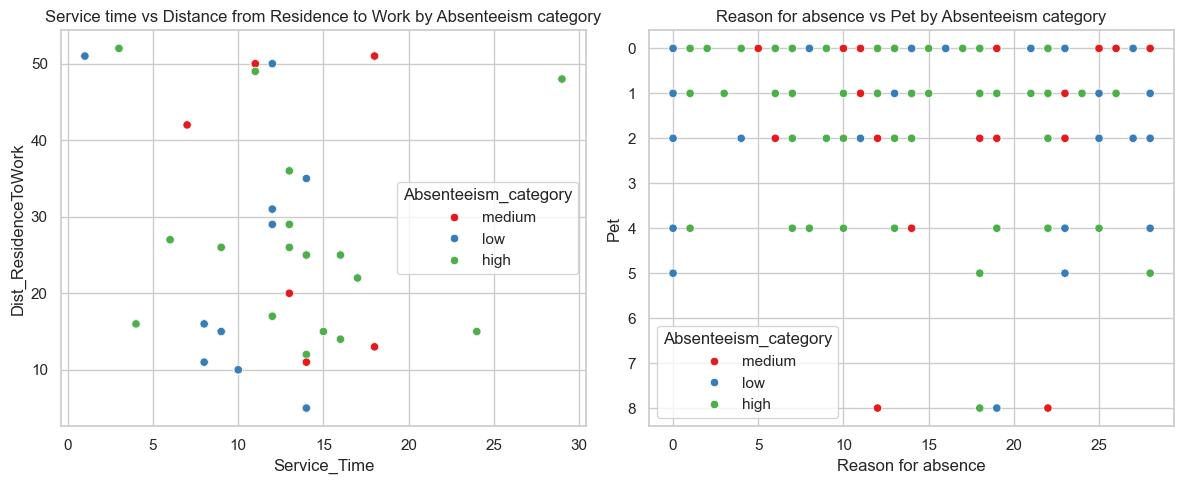

In [66]:
# Scatterplot to check if there is any separatability or not

sns.set_style("whitegrid")

# Create a 1x2 figure (side by side plots)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Service time vs Distance from Residence to Work
g1 = sns.scatterplot(x='Service_Time', y='Dist_ResidenceToWork', hue='Absenteeism_category', data=df, ax=axes[0], palette='Set1')
axes[0].set_title("Service time vs Distance from Residence to Work by Absenteeism category")

# Plot 2: Reason for absence vs Pet
g2 = sns.scatterplot(x='Reason for absence', y='Pet', hue='Absenteeism_category', data=df, ax=axes[1], palette='Set1')
axes[1].set_title("Reason for absence vs Pet by Absenteeism category")

# Adjust layout
plt.tight_layout()
plt.show()

#
There is no separatability, there is overlap means noise exists

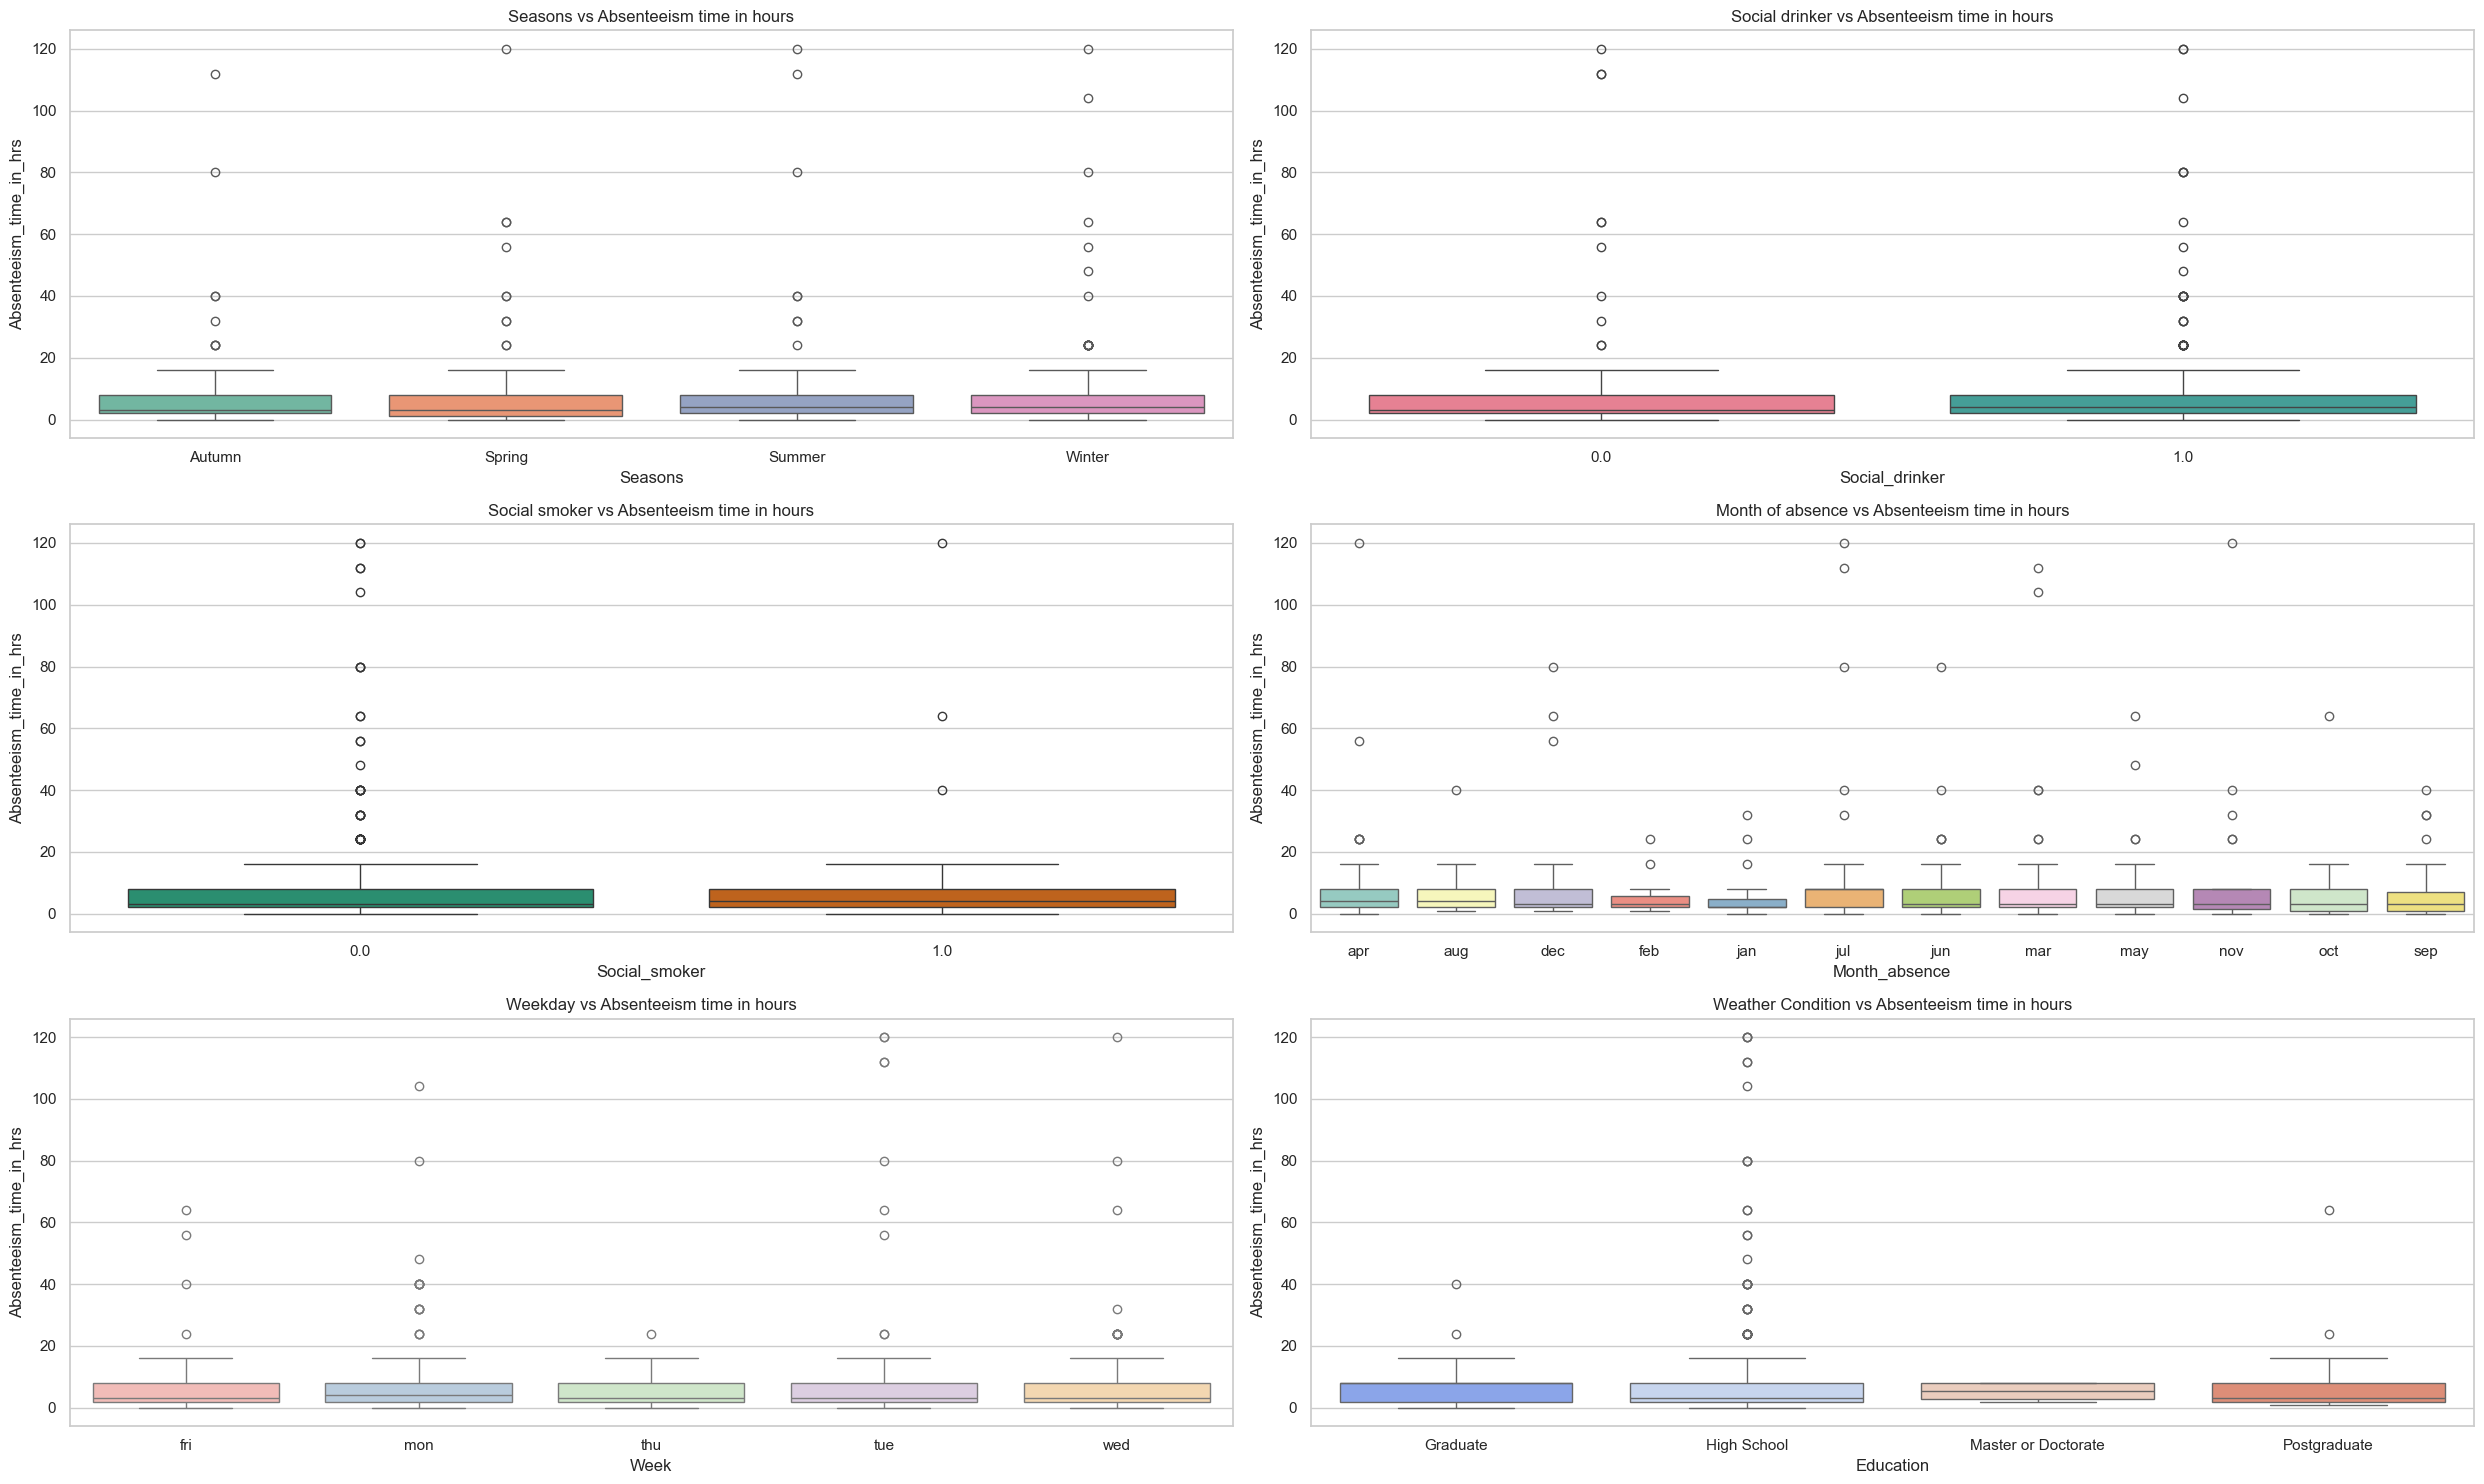

In [67]:
# Create 3x2 subplot grid- boxplots
fig, axes = plt.subplots(3, 2, figsize=(25, 15))

# Flatten axes for easier iteration
axes = axes.flatten()

# 1. Season vs Absenteeism time in hours
sns.boxplot(x='Seasons', y='Absenteeism_time_in_hrs', data=df, palette="Set2", ax=axes[0])
axes[0].set_title("Seasons vs Absenteeism time in hours")

# 2. Social drinker vs Absenteeism time in hours
sns.boxplot(x='Social_drinker', y='Absenteeism_time_in_hrs', data=df, palette="husl", ax=axes[1])
axes[1].set_title("Social drinker vs Absenteeism time in hours")

# 3. social smoker vs Absenteeism time in hours
sns.boxplot(x='Social_smoker', y='Absenteeism_time_in_hrs', data=df, palette="Dark2", ax=axes[2])
axes[2].set_title("Social smoker vs Absenteeism time in hours")

# 4. Month vs Absenteeism time in hours
sns.boxplot(x='Month_absence', y='Absenteeism_time_in_hrs', data=df, palette="Set3", ax=axes[3])
axes[3].set_title("Month of absence vs Absenteeism time in hours")

# 5. Weekday vs Absenteeism time in hours
sns.boxplot(x='Week', y='Absenteeism_time_in_hrs', data=df, palette="Pastel1", ax=axes[4])
axes[4].set_title("Weekday vs Absenteeism time in hours")

# 6. Education vs Absenteeism time in hours
sns.boxplot(x='Education', y='Absenteeism_time_in_hrs', data=df, palette="coolwarm", ax=axes[5])
axes[5].set_title("Weather Condition vs Absenteeism time in hours")

# Adjust layout
plt.tight_layout()
plt.show()


#
Lot of upper outliers, means this problem can not be solved using statsistical models, we need to introduce machine learning models for such problem

# Feature Engineering

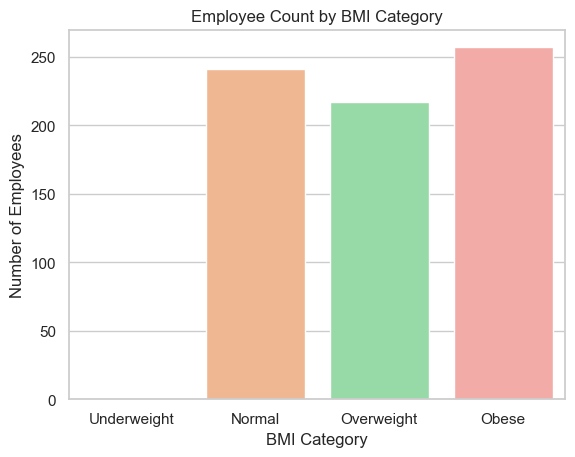

In [68]:
# 1: BMI categories (Underweight, Normal, Overweight, Obese)
df['BMI_Category'] = df['Body_mass_index'].apply(lambda x:'Underweight' if x < 18.5 else 'Normal' if 18.5 <= x < 25 else 'Overweight' 
if 25 <= x < 30 else 'Obese')

sns.countplot(data=df, x='BMI_Category', order=['Underweight', 'Normal', 'Overweight', 'Obese'], palette='pastel')
plt.title('Employee Count by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Employees')
plt.show()


# 
Feature engineering helps because: It captures health related patterns - people with very low or very hig BMI categories may have higher absenteeism. 

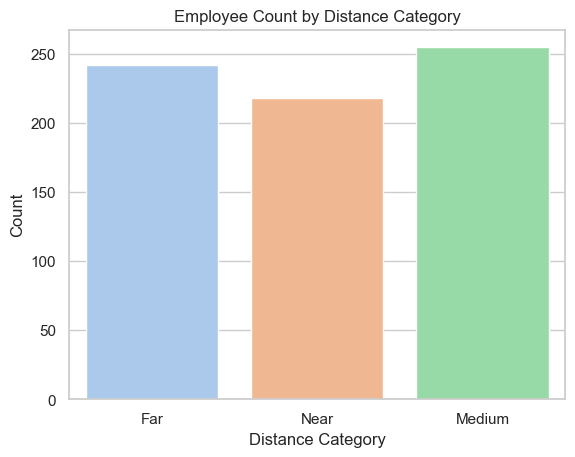

In [69]:
#2: Distance bins (Near, Medium, Far)
df['Distance_Category'] = df['Dist_ResidenceToWork'].apply(lambda x:'Near' if x <= 20 else 'Medium' if 20 < x <= 35 else 'Far')

sns.countplot(data=df, x='Distance_Category', palette='pastel')
plt.title('Employee Count by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Count')
plt.show()

# 
Helps to check whether longer travel distance may increase fatigue and delays, leading to more absence by binning into 3 categories

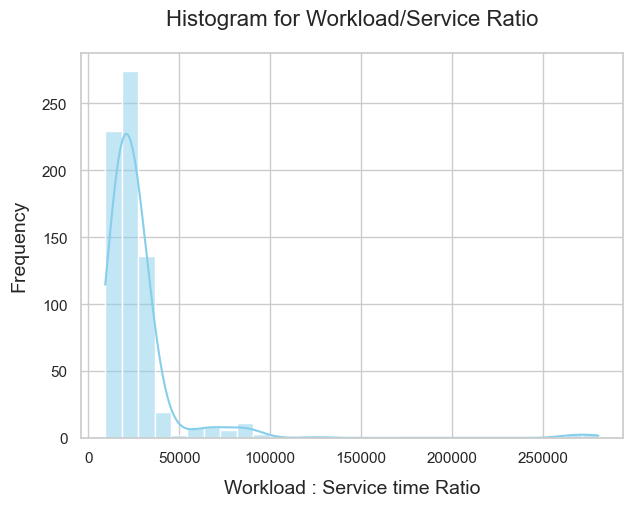

In [70]:
# Create a histogram
plt.figure(figsize=(7, 5))
df['Workload_Service_Ratio'] = df['Average_Workload'] / df['Service_Time']
sns.histplot(df['Workload_Service_Ratio'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Workload : Service time Ratio', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.title('Histogram for Workload/Service Ratio', fontsize=16, pad=20)

# Show the plot
plt.show()



# 
Helps to see how overloaded an employee is

In [71]:
# Dropping the unwanted columns after feature engineering
df.drop(['Height','Weight','Dist_ResidenceToWork','Average_Workload','Service_Time', 'Absenteeism_time_in_hrs'],axis=1,inplace=True)


## Q2. Prediction Using a Statistical Model (Logistic Regression)  


1. Build a multiclass Logistic Regression model to predict Absenteeism category.  
2. Compare training and test performance using appropriate metrics such as accuracy, macro F1-score, or confusion matrix.  
3. In a markdown explanation:
   - Explain why Logistic Regression is considered a statistical model.
   - Identify which parts of your solution represent statistical modelling (for example, coefficients, linear relationships).
   - Identify which parts represent machine learning concepts (train-test split, generalization, evaluation).  
4. Provide a short interpretation of the model’s performance.

---

# Separate X & y

In [72]:
X = df.drop('Absenteeism_category', axis=1)
y = df['Absenteeism_category']

# Split train and test

In [73]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(572, 17)
(143, 17)
(572,)
(143,)


In [74]:
# Missing values Imputation from train to test and train data for X

mode = X_train['Reason for absence'].dropna().mode()[0]
# Fill missing value 
X_train['Reason for absence'].fillna(mode, inplace = True)
X_test['Reason for absence'].fillna(mode, inplace = True)

mode = X_train['Month_absence'].dropna().mode()[0]
# Fill missing value 
X_train['Month_absence'].fillna(mode, inplace = True)
X_test['Month_absence'].fillna(mode, inplace = True)

mode = X_train['Disciplinary_failure'].dropna().mode()[0]
# Fill missing value 
X_train['Disciplinary_failure'].fillna(mode, inplace = True)
X_test['Disciplinary_failure'].fillna(mode, inplace = True)

mode = X_train['Education'].dropna().mode()[0]
# Fill missing value 
X_train['Education'].fillna(mode, inplace = True)
X_test['Education'].fillna(mode, inplace = True)

mode = X_train['Education'].dropna().mode()[0]
# Fill missing value 
X_train['Education'].fillna(mode, inplace = True)
X_test['Education'].fillna(mode, inplace = True)

mode = X_train['Son'].dropna().mode()[0]
# Fill missing value 
X_train['Son'].fillna(mode, inplace = True)
X_test['Son'].fillna(mode, inplace = True)

mode = X_train['Social_smoker'].dropna().mode()[0]
# Fill missing value 
X_train['Social_smoker'].fillna(mode, inplace = True)
X_test['Social_smoker'].fillna(mode, inplace = True)

mode = X_train['Social_drinker'].dropna().mode()[0]
# Fill missing value 
X_train['Social_drinker'].fillna(mode, inplace = True)
X_test['Social_drinker'].fillna(mode, inplace = True)

mode = X_train['Pet'].dropna().mode()[0]
# Fill missing value 
X_train['Pet'].fillna(mode, inplace = True)
X_test['Pet'].fillna(mode, inplace = True)

median = X_train['Transport_expense'].dropna().median()
# Fill missing value 
X_train['Transport_expense'].fillna(median, inplace = True)
X_test['Transport_expense'].fillna(median, inplace = True)

median = X_train['Age'].dropna().median()
# Fill missing value 
X_train['Age'].fillna(median, inplace = True)
X_test['Age'].fillna(median, inplace = True)

median = X_train['Hit target'].dropna().median()
# Fill missing value 
X_train['Hit target'].fillna(median, inplace = True)
X_test['Hit target'].fillna(median, inplace = True)

median = X_train['Body_mass_index'].dropna().median()
# Fill missing value 
X_train['Body_mass_index'].fillna(median, inplace = True)
X_test['Body_mass_index'].fillna(median, inplace = True)

median = X_train['Workload_Service_Ratio'].dropna().median()
# Fill missing value 
X_train['Workload_Service_Ratio'].fillna(median, inplace = True)
X_test['Workload_Service_Ratio'].fillna(median, inplace = True)

X_train.isnull().sum()

Reason for absence        0
Month_absence             0
Week                      0
Seasons                   0
Transport_expense         0
Age                       0
Hit target                0
Disciplinary_failure      0
Education                 0
Son                       0
Social_drinker            0
Social_smoker             0
Pet                       0
Body_mass_index           0
BMI_Category              0
Distance_Category         0
Workload_Service_Ratio    0
dtype: int64

***Imputation - helped us to fill the missing Values***

In [75]:
X_test.isnull().sum()

Reason for absence        0
Month_absence             0
Week                      0
Seasons                   0
Transport_expense         0
Age                       0
Hit target                0
Disciplinary_failure      0
Education                 0
Son                       0
Social_drinker            0
Social_smoker             0
Pet                       0
Body_mass_index           0
BMI_Category              0
Distance_Category         0
Workload_Service_Ratio    0
dtype: int64

 ## OHE (One Hot Encoding)

In [76]:
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

In [77]:
X_train.shape

(572, 69)

In [78]:
X_test.shape

(143, 69)

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 276 to 110
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transport_expense              572 non-null    float64
 1   Age                            572 non-null    float64
 2   Hit target                     572 non-null    float64
 3   Body_mass_index                572 non-null    float64
 4   Workload_Service_Ratio         572 non-null    float64
 5   Reason for absence_1.0         572 non-null    bool   
 6   Reason for absence_2.0         572 non-null    bool   
 7   Reason for absence_3.0         572 non-null    bool   
 8   Reason for absence_4.0         572 non-null    bool   
 9   Reason for absence_5.0         572 non-null    bool   
 10  Reason for absence_6.0         572 non-null    bool   
 11  Reason for absence_7.0         572 non-null    bool   
 12  Reason for absence_8.0         572 non-null    bool  

In [80]:
X_train.head()

,Transport_expense,Age,Hit target,Body_mass_index,Workload_Service_Ratio,Reason for absence_1.0,Reason for absence_2.0,Reason for absence_3.0,Reason for absence_4.0,Reason for absence_5.0,...,Social_smoker_1.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,BMI_Category_Obese,BMI_Category_Overweight,Distance_Category_Medium,Distance_Category_Near
276,231.0,39.0,81.0,35.0,21015.500000,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
62,179.0,38.0,93.0,31.0,14081.388889,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
212,289.0,33.0,92.0,30.0,29144.923077,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
333,179.0,38.0,97.0,31.0,15779.500000,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
546,118.0,37.0,93.0,28.0,26851.900000,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [81]:
# Scaling the numerical features

scaler = MinMaxScaler()
# Scale only these features
num_vars = ['Transport_expense','Age','Hit target','Body_mass_index','Workload_Service_Ratio']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train[num_vars] = scaler.transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

print('Shape of train data',X_train.shape)
print('Shape of test data',X_test.shape)

#Count classes in train and test
print('Train set count of each class',Counter(y_train))
print('Test set count of each class',Counter(y_test))


Shape of train data (572, 69)
Shape of test data (143, 69)
Train set count of each class Counter({'low': 222, 'high': 208, 'medium': 142})
Test set count of each class Counter({'low': 54, 'high': 54, 'medium': 35})


# Introduce & fit model

In [82]:
lg = LogisticRegression()
lg.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Evaluate the model

In [83]:
# Predictions
y_pred_train = lg.predict(X_train)
y_pred_test = lg.predict(X_test)

# Train set results
print("Confusion Matrix of Train Data:")
print(results_train := confusion_matrix(y_train, y_pred_train))
print("\nClassification Report of Train Data:")
print(classification_report(y_train, y_pred_train))

print("\n" + "="*60 + "\n")  # Separator for clarity

# Test set results
print("Confusion Matrix of Test Data:")
print(results_test := confusion_matrix(y_test, y_pred_test))
print("\nClassification Report of Test Data:")
print(classification_report(y_test, y_pred_test))

Confusion Matrix of Train Data:
[[183  18   7]
 [ 24 184  14]
 [ 32  66  44]]

Classification Report of Train Data:
              precision    recall  f1-score   support

        high       0.77      0.88      0.82       208
         low       0.69      0.83      0.75       222
      medium       0.68      0.31      0.43       142

    accuracy                           0.72       572
   macro avg       0.71      0.67      0.66       572
weighted avg       0.71      0.72      0.69       572



Confusion Matrix of Test Data:
[[43  5  6]
 [ 3 36 15]
 [ 6 15 14]]

Classification Report of Test Data:
              precision    recall  f1-score   support

        high       0.83      0.80      0.81        54
         low       0.64      0.67      0.65        54
      medium       0.40      0.40      0.40        35

    accuracy                           0.65       143
   macro avg       0.62      0.62      0.62       143
weighted avg       0.65      0.65      0.65       143



## 2)
________________________________________________________________________________________________________________________
Train set has an accuracy of 72%, whereas test has accuracy of 65%
The model performs good for High and Low category on both training and test data.
While for medium the confusion matrix didnt give good predictions for both test and train because of miniority class

## 3-1)
_____________________________________________________________________________________________________________________________________________________
Logistic Regression is considered as statistical model because it uses fixed coefficients, instead of starting with random weights and improving them through gradient descent like machine-learning models do.

## 3-2)
______________________________________________________________________________________________________________________________________________________
The actual process of statistical modeling, performed in the "introduce" and "fit" steps, is responsible for estimating and finalizing the coefficients (beta's) in the model equation (y = beta 0 + beta 1 + \beta 2 + ..... + \beta n), thereby defining the precise mathematical relationship..

## 3-3) 
_____________________________________________________________________________________________________________________________________________________
1. Train–Test Split
Data Segregation: This step involves separating the full dataset into distinct training and testing subsets.

2. Generalization
Model Applicability: This is the machine learning objective that requires the model to perform accurately not just on the data it was trained on (training set), but also on new, previously unseen data (the test set or real-world input).

3. Evaluation (accuracy, confusion matrix)
This stage uses specialized performance metrics (such as accuracy, precision, and the confusion matrix) to quantify how well the model's predictions align with the actual outcomes.

It is essential for identifying issues like overfitting (poor generalization) or underfitting (poor learning).

## 4)
The model performs reasonably well, showing good accuracy on training and slightly lower accuracy on test data, which means it generalizes fairly but struggles with the medium absenteeism class, indicating it has class imbalance

# SMOTE to balance classes

In [84]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)


print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

# shape increased major class * 3
print('Shape of train data',X_train_smote.shape)

Before SMOTE : Counter({'low': 222, 'high': 208, 'medium': 142})
After SMOTE : Counter({'low': 222, 'medium': 222, 'high': 222})
Shape of train data (666, 69)


# After SMOTE fit training samples

In [85]:
lg.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_train_s = lg.predict(X_train)
y_pred_test_s = lg.predict(X_test)

# Train set results
print("Confusion Matrix of Train Data:")
print(results_train := confusion_matrix(y_train, y_pred_train_s))
print("\nClassification Report of Train Data:")
print(classification_report(y_train, y_pred_train_s))

print("\n" + "="*60 + "\n")  # Separator for clarity

# Test set results
print("Confusion Matrix of Test Data:")
print(results_test := confusion_matrix(y_test, y_pred_test_s))
print("\nClassification Report of Test Data:")
print(classification_report(y_test, y_pred_test_s))

Confusion Matrix of Train Data:
[[183  18   7]
 [ 26 161  35]
 [ 35  42  65]]

Classification Report of Train Data:
              precision    recall  f1-score   support

        high       0.75      0.88      0.81       208
         low       0.73      0.73      0.73       222
      medium       0.61      0.46      0.52       142

    accuracy                           0.72       572
   macro avg       0.70      0.69      0.69       572
weighted avg       0.71      0.72      0.71       572



Confusion Matrix of Test Data:
[[17  0 37]
 [ 0  5 49]
 [ 3  0 32]]

Classification Report of Test Data:
              precision    recall  f1-score   support

        high       0.85      0.31      0.46        54
         low       1.00      0.09      0.17        54
      medium       0.27      0.91      0.42        35

    accuracy                           0.38       143
   macro avg       0.71      0.44      0.35       143
weighted avg       0.76      0.38      0.34       143



***In this case, SMOTE didn't work well for test set low classification prediction***

## Q3. Prediction Using Decision Trees (Gini and Entropy)  


1. Build two Decision Tree models:
   - One using the Gini Index  
   - One using Entropy (Information Gain)

2. Compare both Decision Tree models with the Logistic Regression model using:
   - Accuracy  
   - Confusion matrices  

3. In the markdown explanation:
   - Describe the difference between Gini and Entropy.
   - Explain how tree-based models differ from statistical models.
   - Recommend which model should be deployed, with justification based on interpretability, accuracy, stability, and business usefulness.

---


In [86]:
## Solutions here
#Read file as panda dataframe
df_new = pd.read_csv(r"employee.csv")
df_new.head()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [87]:
# Removing invalid entries

# Dropped rows with entry as "0"
df_new = df_new.drop(df_new[df_new['Month of absence'] == 0].index)

# Dropped rows with empty values in Absenteeism_time_in_hrs
df_new = df_new.drop(df_new[df_new['Absenteeism time in hours'].isna()].index)

# Typecast: Convert 'Workload Average/day' to float and replacing ',' by ' ' 
df_new["Work load Average/day "] = df_new["Work load Average/day "].replace(",", "", regex=True).astype(float)

In [88]:
#Add a feature 'Absenteeism category' and check condition
df_new['Absenteeism_category'] = df_new['Absenteeism time in hours'].apply(lambda value: 'low' if value <= 2 else 'medium' if 3 <= value <= 5  else 'high')

In [89]:
df_new.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
Absenteeism_category                object
dtype: object

In [90]:
X1 = df_new.drop(['Absenteeism_category','Absenteeism time in hours','Height','Weight'], axis= 1)
y1 = df_new['Absenteeism_category']

In [91]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 1) Decision Tree using Gini

In [92]:
# Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train_dt,y_train_dt)

# Predictions
y_pred_train_g = clf.predict(X_train_dt)
y_pred_test_g = clf.predict(X_test_dt)

# Train set results
print("Confusion Matrix of Train Data:")
print(results_train := confusion_matrix(y_train_dt, y_pred_train_g))
print("\nClassification Report of Train Data:")
print(classification_report(y_train_dt, y_pred_train_g))

print("\n" + "="*60 + "\n")  # Code - for Spaces and Lines - Separator for O/P clarity

# Test set results
print("Confusion Matrix of Test Data:")
print(results_test := confusion_matrix(y_test_dt, y_pred_test_g))
print("\nClassification Report of Test Data:")
print(classification_report(y_test_dt, y_pred_test_g))


Confusion Matrix of Train Data:
[[207   0   1]
 [  1 221   0]
 [  3   7 132]]

Classification Report of Train Data:
              precision    recall  f1-score   support

        high       0.98      1.00      0.99       208
         low       0.97      1.00      0.98       222
      medium       0.99      0.93      0.96       142

    accuracy                           0.98       572
   macro avg       0.98      0.97      0.98       572
weighted avg       0.98      0.98      0.98       572



Confusion Matrix of Test Data:
[[41  7  6]
 [ 5 37 12]
 [ 8 15 12]]

Classification Report of Test Data:
              precision    recall  f1-score   support

        high       0.76      0.76      0.76        54
         low       0.63      0.69      0.65        54
      medium       0.40      0.34      0.37        35

    accuracy                           0.63       143
   macro avg       0.60      0.60      0.59       143
weighted avg       0.62      0.63      0.62       143



# Decision tree usning entropy

In [93]:
dt = DecisionTreeClassifier(criterion="entropy")
# Train the model
dt.fit(X_train_dt,y_train_dt)

# Predictions
y_pred_train_e = dt.predict(X_train_dt)
y_pred_test_e = dt.predict(X_test_dt)

# Train set results
print("Confusion Matrix of Train Data:")
print(results_train := confusion_matrix(y_train_dt, y_pred_train_e))
print("\nClassification Report of Train Data:")
print(classification_report(y_train_dt, y_pred_train_e))

print("\n" + "="*60 + "\n")  # Code - for Spaces and Lines - Separator for O/P clarity

# Test set results
print("Confusion Matrix of Test Data:")
print(results_test := confusion_matrix(y_test_dt, y_pred_test_e))
print("\nClassification Report of Test Data:")
print(classification_report(y_test_dt, y_pred_test_e))

Confusion Matrix of Train Data:
[[207   0   1]
 [  1 220   1]
 [  3   7 132]]

Classification Report of Train Data:
              precision    recall  f1-score   support

        high       0.98      1.00      0.99       208
         low       0.97      0.99      0.98       222
      medium       0.99      0.93      0.96       142

    accuracy                           0.98       572
   macro avg       0.98      0.97      0.97       572
weighted avg       0.98      0.98      0.98       572



Confusion Matrix of Test Data:
[[41  5  8]
 [ 4 39 11]
 [ 7 14 14]]

Classification Report of Test Data:
              precision    recall  f1-score   support

        high       0.79      0.76      0.77        54
         low       0.67      0.72      0.70        54
      medium       0.42      0.40      0.41        35

    accuracy                           0.66       143
   macro avg       0.63      0.63      0.63       143
weighted avg       0.66      0.66      0.66       143



In [94]:
# Model                           Train Accuracy          Test Accuracy 

# Logistic Regression               0.72                   0.65
# Decision Tree (Gini)              0.98                   0.61
# Decision Tree (Entropy)           0.99                   0.58


# 2)
Logistic Regression in this case generalizes (predicts) well the train–test set comparatively.
Whereas both Decision Trees (Gini & Entropy) overfit heavily -> extremely high train accuracy but low test accuracy.

# 3-1)
Gini is the quick and easy metric for figuring out how to split a node. It's faster because it just uses simple math—no complex logs or anything. Basically, it checks the odds of totally messing up the prediction if we randomly picked an item from that group.

Entropy is the deep dive metric, so it's a bit slower to calculate because it involves logarithms. Conceptually, it measures the raw messiness or uncertainty in the data. When the algorithm uses it, it's trying to find the split that gives the best Information Gain, meaning the split that cleans up the messiest part of the data the most.

# 3-2) 
Trees split based on data frequency and are robust to noise, 
while statistical models rely on linear equations, need preprocessing, and are more sensitive to outliers

# 3-3)


I think we should definitely go with the Decision Tree that uses Gini Impurity. The main reason is speed: Gini is super fast, so the model processes data quicker. Plus, as a machine learning model, it's generally more robust than a classic statistical model like Logistic Regression — it can handle outliers and messy, noisy data better.